In [1]:
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC 
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense


/Users/Shameetha/anaconda3/envs/PythonData/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/Shameetha/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.


In [2]:
mov_df = pd.read_csv("Resources/cleaned_data.csv")


In [3]:
# Bin the score into 3 buckets: less than 6, 6~8 and 8~10, which represents bad, good and excellent respectively.
bins = [0,6,8,10]
labels = [1, 2, 3]
mov_df['binned_score'] = pd.cut(mov_df['imdb_score'], bins=bins, labels=labels)
mov_df.head()

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,binned_score
0,0,Color,James Cameron,723.0,178.0,949.375628,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000.000000,2
1,1,Color,Gore Verbinski,302.0,169.0,563.000000,1000.0,Orlando Bloom,40000.0,309404152.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,16719.617661,2
2,2,Color,Sam Mendes,602.0,148.0,949.375628,161.0,Rory Kinnear,11000.0,200074175.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000.000000,2
3,3,Color,Christopher Nolan,813.0,164.0,22000.000000,23000.0,Christian Bale,27000.0,448130642.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000.000000,3
4,5,Color,Andrew Stanton,462.0,132.0,475.000000,530.0,Samantha Morton,640.0,73058679.0,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000.000000,2


In [4]:
target = mov_df["binned_score"]
target_names = ["Bad", "Good", "Excellent"]

In [5]:
genre_df = mov_df['genres'].str.get_dummies(sep='|')

In [6]:
genre_df.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
genre_df.sum().sort_values(ascending=False)


Drama          1920
Comedy         1485
Thriller       1112
Action          957
Romance         868
Adventure       782
Crime           710
Fantasy         510
Sci-Fi          495
Family          447
Horror          388
Mystery         383
Biography       241
Animation       198
Music           157
War             156
History         152
Sport           150
Musical          98
Western          60
Documentary      55
Film-Noir         1
dtype: int64

In [8]:
mov_df.columns.values

array(['Unnamed: 0', 'color', 'director_name', 'num_critic_for_reviews',
       'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes', 'binned_score'], dtype=object)

In [9]:
data = pd.get_dummies(mov_df[["num_critic_for_reviews", "duration", "director_facebook_likes", "actor_3_facebook_likes",
               "actor_1_facebook_likes", "gross", "num_voted_users", "cast_total_facebook_likes", 
               "facenumber_in_poster", "num_user_for_reviews", "content_rating", "budget", "actor_2_facebook_likes",
               "movie_facebook_likes"]])
data = data.join(genre_df)

feature_names = data.columns
data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,723.0,178.0,949.375628,855.0,1000.0,760505847.0,886204.0,4834.0,0.0,3054.0,...,0,0,0,0,0,1,0,0,0,0
1,302.0,169.0,563.000000,1000.0,40000.0,309404152.0,471220.0,48350.0,0.0,1238.0,...,0,0,0,0,0,0,0,0,0,0
2,602.0,148.0,949.375628,161.0,11000.0,200074175.0,275868.0,11700.0,1.0,994.0,...,0,0,0,0,0,0,0,1,0,0
3,813.0,164.0,22000.000000,23000.0,27000.0,448130642.0,1144337.0,106759.0,0.0,2701.0,...,0,0,0,0,0,0,0,1,0,0
4,462.0,132.0,475.000000,530.0,640.0,73058679.0,212204.0,1873.0,1.0,738.0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
mov_df.columns.values

array(['Unnamed: 0', 'color', 'director_name', 'num_critic_for_reviews',
       'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes', 'binned_score'], dtype=object)

In [11]:
data_simple = pd.get_dummies(mov_df[[ "duration", "director_facebook_likes", "actor_3_facebook_likes",
               "actor_1_facebook_likes", "cast_total_facebook_likes", 
               "facenumber_in_poster", "content_rating", "budget", "actor_2_facebook_likes"]])
data_simple = data_simple.join(genre_df)
feature_names_simple = data_simple.columns
data_simple.head()

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,budget,actor_2_facebook_likes,content_rating_G,content_rating_NC-17,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,178.0,949.375628,855.0,1000.0,4834.0,0.0,237000000.0,936.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,169.0,563.000000,1000.0,40000.0,48350.0,0.0,300000000.0,5000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,148.0,949.375628,161.0,11000.0,11700.0,1.0,245000000.0,393.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,164.0,22000.000000,23000.0,27000.0,106759.0,0.0,250000000.0,23000.0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,132.0,475.000000,530.0,640.0,1873.0,1.0,263700000.0,632.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=target)
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(data_simple, target, random_state=42, stratify=target)

In [13]:
# Decision Tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7111344537815126

In [14]:
clf_simple = tree.DecisionTreeClassifier()
clf_simple = clf_simple.fit(X_train_simple, y_train_simple)
clf_simple.score(X_test_simple, y_test_simple)

0.6638655462184874

In [15]:
joblib.dump(clf_simple, 'Models/decision_tree_simple.pkl')
joblib.dump(clf, 'Models/decision_tree_complex.pkl')

['Models/decision_tree_complex.pkl']

In [16]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7867647058823529

In [17]:
rf_simple = RandomForestClassifier(n_estimators=200)
rf_simple = rf_simple.fit(X_train_simple, y_train_simple)
rf_simple.score(X_test_simple, y_test_simple)

0.7289915966386554

In [18]:
joblib.dump(rf, 'Models/rf_complex.pkl')
joblib.dump(rf_simple, 'Models/rf_simple.pkl')

['Models/rf_simple.pkl']

In [19]:
# sorted(zip(rf.feature_importances_, feature_names), reverse=True)

In [20]:
# sorted(zip(rf_simple.feature_importances_, feature_names_new), reverse=True)

In [21]:
predictions_simple = rf_simple.predict(X_train_simple)
print(classification_report(y_train_simple, predictions_simple,
                            target_names=target_names))

             precision    recall  f1-score   support

        Bad       1.00      1.00      1.00       873
       Good       1.00      1.00      1.00      1863
  Excellent       1.00      1.00      1.00       118

avg / total       1.00      1.00      1.00      2854



k: 1, Train/Test Score: 1.000/0.593
k: 3, Train/Test Score: 0.769/0.584
k: 5, Train/Test Score: 0.725/0.598
k: 7, Train/Test Score: 0.705/0.620
k: 9, Train/Test Score: 0.700/0.642
k: 11, Train/Test Score: 0.691/0.636
k: 13, Train/Test Score: 0.680/0.654
k: 15, Train/Test Score: 0.674/0.644
k: 17, Train/Test Score: 0.674/0.644
k: 19, Train/Test Score: 0.673/0.646


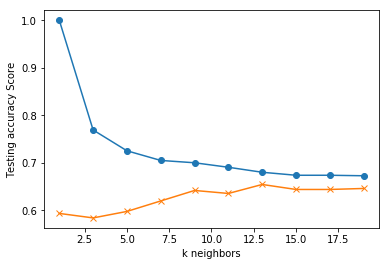

In [22]:
# K Nearest Neighbors

# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [23]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.654


k: 1, Train/Test Score: 1.000/0.546
k: 3, Train/Test Score: 0.781/0.590
k: 5, Train/Test Score: 0.723/0.604
k: 7, Train/Test Score: 0.706/0.612
k: 9, Train/Test Score: 0.700/0.610
k: 11, Train/Test Score: 0.694/0.612
k: 13, Train/Test Score: 0.677/0.623
k: 15, Train/Test Score: 0.671/0.629
k: 17, Train/Test Score: 0.672/0.621
k: 19, Train/Test Score: 0.672/0.608


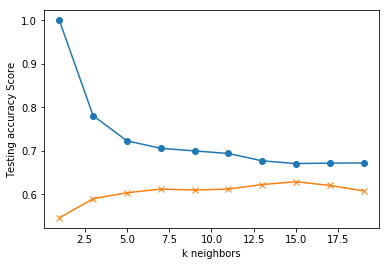

k=15 Test Acc: 0.629


In [24]:
# K Nearest Neighbors

# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores_simple = []
test_scores_simple = []
for k in range(1, 20, 2):
    knn_simple = KNeighborsClassifier(n_neighbors=k)
    knn_simple.fit(X_train_simple, y_train_simple)
    train_score_simple = knn_simple.score(X_train_simple, y_train_simple)
    test_score_simple = knn_simple.score(X_test_simple, y_test_simple)
    train_scores_simple.append(train_score_simple)
    test_scores_simple.append(test_score_simple)
    print(f"k: {k}, Train/Test Score: {train_score_simple:.3f}/{test_score_simple:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores_simple, marker='o')
plt.plot(range(1, 20, 2), test_scores_simple, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()
# Note that k: 9 seems to be the best choice for this dataset
knn_simple = KNeighborsClassifier(n_neighbors=15)
knn_simple.fit(X_train_simple, y_train_simple)
print('k=15 Test Acc: %.3f' % knn_simple.score(X_test_simple, y_test_simple))

In [25]:
joblib.dump(knn, 'Models/knn_complex.pkl')
joblib.dump(knn_simple, 'Models/knn_simple.pkl')

['Models/knn_simple.pkl']

In [26]:
# SVM
# Support vector machine linear classifier
model = SVC()
model.fit(X_train, y_train)

# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.658


In [27]:
# Calculate classification report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

        Bad       1.00      0.02      0.03       291
       Good       0.66      1.00      0.79       621
  Excellent       0.00      0.00      0.00        40

avg / total       0.73      0.66      0.53       952



/Users/Shameetha/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
# SVM
# Support vector machine linear classifier
model_simple = SVC()
model_simple.fit(X_train_simple, y_train_simple)

# Model Accuracy
print('Test Acc: %.3f' % model_simple.score(X_test_simple, y_test_simple))
# Calculate classification report
predictions_simple = model_simple.predict(X_test_simple)
print(classification_report(y_test_simple, predictions_simple,
                            target_names=target_names))

Test Acc: 0.659
             precision    recall  f1-score   support

        Bad       1.00      0.02      0.04       291
       Good       0.66      1.00      0.79       621
  Excellent       0.00      0.00      0.00        40

avg / total       0.73      0.66      0.53       952



/Users/Shameetha/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
joblib.dump(model, 'Models/svm_complex.pkl')
joblib.dump(model_simple, 'Models/svm_simple.pkl')

['Models/svm_simple.pkl']

In [30]:
svm_model = joblib.load('Models/svm_complex.pkl')

In [31]:
predictions = svm_model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

        Bad       1.00      0.02      0.03       291
       Good       0.66      1.00      0.79       621
  Excellent       0.00      0.00      0.00        40

avg / total       0.73      0.66      0.53       952



/Users/Shameetha/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
svm_model_simple = joblib.load('Models/svm_simple.pkl')

In [33]:
predictions_simple = svm_model_simple.predict(X_test_simple)
print(classification_report(y_test_simple, predictions_simple,
                            target_names=target_names))

             precision    recall  f1-score   support

        Bad       1.00      0.02      0.04       291
       Good       0.66      1.00      0.79       621
  Excellent       0.00      0.00      0.00        40

avg / total       0.73      0.66      0.53       952



/Users/Shameetha/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
predictions_simple = rf_simple.predict(X_train_simple)
print(classification_report(y_train_simple, predictions_simple,
                            target_names=target_names))

             precision    recall  f1-score   support

        Bad       1.00      1.00      1.00       873
       Good       1.00      1.00      1.00      1863
  Excellent       1.00      1.00      1.00       118

avg / total       1.00      1.00      1.00      2854



In [35]:
print(X_train.shape, y_train.shape)


(2854, 40) (2854,)


In [36]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [37]:
X_scaler_simple = StandardScaler().fit(X_train_simple)
X_train_scaled_simple = X_scaler_simple.transform(X_train_simple)
X_test_scaled_simple = X_scaler_simple.transform(X_test_simple)

In [38]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [39]:
# Step 1: Label-encode data set
label_encoder_simple = LabelEncoder()
label_encoder_simple.fit(y_train_simple)
encoded_y_train_simple = label_encoder_simple.transform(y_train_simple)
encoded_y_test_simple = label_encoder_simple.transform(y_test_simple)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical_simple = to_categorical(encoded_y_train_simple)
y_test_categorical_simple = to_categorical(encoded_y_test_simple)

In [40]:

model = Sequential()
model.add(Dense(units=9, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=9, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 9)                 369       
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 30        
Total params: 489
Trainable params: 489
Non-trainable params: 0
_________________________________________________________________


In [41]:
model_simple = Sequential()
model_simple.add(Dense(units=9, activation='relu', input_dim=X_train_simple.shape[1]))
model_simple.add(Dense(units=9, activation='relu'))
model_simple.add(Dense(units=3, activation='softmax'))
model_simple.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 9)                 324       
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 30        
Total params: 444
Trainable params: 444
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
# Compile the model
model_simple.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=500,
    shuffle=True,
    verbose=2
)

Epoch 1/500
 - 0s - loss: 1.0864 - acc: 0.4793
Epoch 2/500
 - 0s - loss: 0.8488 - acc: 0.6454
Epoch 3/500
 - 0s - loss: 0.7358 - acc: 0.6868
Epoch 4/500
 - 0s - loss: 0.6734 - acc: 0.7130
Epoch 5/500
 - 0s - loss: 0.6305 - acc: 0.7285
Epoch 6/500
 - 0s - loss: 0.6010 - acc: 0.7309
Epoch 7/500
 - 0s - loss: 0.5798 - acc: 0.7344
Epoch 8/500
 - 0s - loss: 0.5625 - acc: 0.7418
Epoch 9/500
 - 0s - loss: 0.5489 - acc: 0.7467
Epoch 10/500
 - 0s - loss: 0.5373 - acc: 0.7519
Epoch 11/500
 - 0s - loss: 0.5266 - acc: 0.7607
Epoch 12/500
 - 0s - loss: 0.5179 - acc: 0.7617
Epoch 13/500
 - 0s - loss: 0.5113 - acc: 0.7673
Epoch 14/500
 - 0s - loss: 0.5037 - acc: 0.7701
Epoch 15/500
 - 0s - loss: 0.4966 - acc: 0.7747
Epoch 16/500
 - 0s - loss: 0.4929 - acc: 0.7768
Epoch 17/500
 - 0s - loss: 0.4861 - acc: 0.7789
Epoch 18/500
 - 0s - loss: 0.4807 - acc: 0.7838
Epoch 19/500
 - 0s - loss: 0.4770 - acc: 0.7796
Epoch 20/500
 - 0s - loss: 0.4730 - acc: 0.7821
Epoch 21/500
 - 0s - loss: 0.4683 - acc: 0.7831
E

Epoch 171/500
 - 0s - loss: 0.3619 - acc: 0.8399
Epoch 172/500
 - 0s - loss: 0.3616 - acc: 0.8336
Epoch 173/500
 - 0s - loss: 0.3631 - acc: 0.8325
Epoch 174/500
 - 0s - loss: 0.3634 - acc: 0.8402
Epoch 175/500
 - 0s - loss: 0.3619 - acc: 0.8385
Epoch 176/500
 - 0s - loss: 0.3619 - acc: 0.8343
Epoch 177/500
 - 0s - loss: 0.3621 - acc: 0.8367
Epoch 178/500
 - 0s - loss: 0.3621 - acc: 0.8381
Epoch 179/500
 - 0s - loss: 0.3608 - acc: 0.8402
Epoch 180/500
 - 0s - loss: 0.3613 - acc: 0.8332
Epoch 181/500
 - 0s - loss: 0.3602 - acc: 0.8406
Epoch 182/500
 - 0s - loss: 0.3621 - acc: 0.8399
Epoch 183/500
 - 0s - loss: 0.3595 - acc: 0.8385
Epoch 184/500
 - 0s - loss: 0.3585 - acc: 0.8399
Epoch 185/500
 - 0s - loss: 0.3588 - acc: 0.8360
Epoch 186/500
 - 0s - loss: 0.3595 - acc: 0.8430
Epoch 187/500
 - 0s - loss: 0.3590 - acc: 0.8413
Epoch 188/500
 - 0s - loss: 0.3571 - acc: 0.8385
Epoch 189/500
 - 0s - loss: 0.3581 - acc: 0.8423
Epoch 190/500
 - 0s - loss: 0.3582 - acc: 0.8353
Epoch 191/500
 - 0s 

 - 0s - loss: 0.3361 - acc: 0.8518
Epoch 339/500
 - 0s - loss: 0.3381 - acc: 0.8521
Epoch 340/500
 - 0s - loss: 0.3346 - acc: 0.8528
Epoch 341/500
 - 0s - loss: 0.3358 - acc: 0.8511
Epoch 342/500
 - 0s - loss: 0.3351 - acc: 0.8525
Epoch 343/500
 - 0s - loss: 0.3356 - acc: 0.8553
Epoch 344/500
 - 0s - loss: 0.3344 - acc: 0.8521
Epoch 345/500
 - 0s - loss: 0.3370 - acc: 0.8542
Epoch 346/500
 - 0s - loss: 0.3346 - acc: 0.8514
Epoch 347/500
 - 0s - loss: 0.3339 - acc: 0.8497
Epoch 348/500
 - 0s - loss: 0.3352 - acc: 0.8507
Epoch 349/500
 - 0s - loss: 0.3333 - acc: 0.8528
Epoch 350/500
 - 0s - loss: 0.3343 - acc: 0.8574
Epoch 351/500
 - 0s - loss: 0.3354 - acc: 0.8511
Epoch 352/500
 - 0s - loss: 0.3371 - acc: 0.8553
Epoch 353/500
 - 0s - loss: 0.3334 - acc: 0.8532
Epoch 354/500
 - 0s - loss: 0.3341 - acc: 0.8556
Epoch 355/500
 - 0s - loss: 0.3342 - acc: 0.8539
Epoch 356/500
 - 0s - loss: 0.3333 - acc: 0.8539
Epoch 357/500
 - 0s - loss: 0.3340 - acc: 0.8577
Epoch 358/500
 - 0s - loss: 0.3340

In [45]:
# Fit the model to the training data
model_simple.fit(
    X_train_scaled_simple,
    y_train_categorical_simple,
    epochs=500,
    shuffle=True,
    verbose=2
)

Epoch 1/500
 - 0s - loss: 1.3138 - acc: 0.2989
Epoch 2/500
 - 0s - loss: 0.9331 - acc: 0.6128
Epoch 3/500
 - 0s - loss: 0.8187 - acc: 0.6594
Epoch 4/500
 - 0s - loss: 0.7631 - acc: 0.6689
Epoch 5/500
 - 0s - loss: 0.7374 - acc: 0.6783
Epoch 6/500
 - 0s - loss: 0.7201 - acc: 0.6808
Epoch 7/500
 - 0s - loss: 0.7055 - acc: 0.6819
Epoch 8/500
 - 0s - loss: 0.6930 - acc: 0.6847
Epoch 9/500
 - 0s - loss: 0.6821 - acc: 0.6927
Epoch 10/500
 - 0s - loss: 0.6727 - acc: 0.6980
Epoch 11/500
 - 0s - loss: 0.6643 - acc: 0.6994
Epoch 12/500
 - 0s - loss: 0.6565 - acc: 0.7043
Epoch 13/500
 - 0s - loss: 0.6509 - acc: 0.7057
Epoch 14/500
 - 0s - loss: 0.6443 - acc: 0.7067
Epoch 15/500
 - 0s - loss: 0.6406 - acc: 0.7099
Epoch 16/500
 - 0s - loss: 0.6356 - acc: 0.7102
Epoch 17/500
 - 0s - loss: 0.6316 - acc: 0.7109
Epoch 18/500
 - 0s - loss: 0.6284 - acc: 0.7137
Epoch 19/500
 - 0s - loss: 0.6258 - acc: 0.7106
Epoch 20/500
 - 0s - loss: 0.6235 - acc: 0.7120
Epoch 21/500
 - 0s - loss: 0.6212 - acc: 0.7130
E

Epoch 171/500
 - 0s - loss: 0.5360 - acc: 0.7586
Epoch 172/500
 - 0s - loss: 0.5365 - acc: 0.7519
Epoch 173/500
 - 0s - loss: 0.5371 - acc: 0.7547
Epoch 174/500
 - 0s - loss: 0.5355 - acc: 0.7547
Epoch 175/500
 - 0s - loss: 0.5347 - acc: 0.7554
Epoch 176/500
 - 0s - loss: 0.5358 - acc: 0.7526
Epoch 177/500
 - 0s - loss: 0.5361 - acc: 0.7509
Epoch 178/500
 - 0s - loss: 0.5361 - acc: 0.7537
Epoch 179/500
 - 0s - loss: 0.5343 - acc: 0.7596
Epoch 180/500
 - 0s - loss: 0.5349 - acc: 0.7533
Epoch 181/500
 - 0s - loss: 0.5340 - acc: 0.7565
Epoch 182/500
 - 0s - loss: 0.5341 - acc: 0.7554
Epoch 183/500
 - 0s - loss: 0.5343 - acc: 0.7554
Epoch 184/500
 - 0s - loss: 0.5343 - acc: 0.7558
Epoch 185/500
 - 0s - loss: 0.5341 - acc: 0.7558
Epoch 186/500
 - 0s - loss: 0.5333 - acc: 0.7526
Epoch 187/500
 - 0s - loss: 0.5342 - acc: 0.7551
Epoch 188/500
 - 0s - loss: 0.5329 - acc: 0.7554
Epoch 189/500
 - 0s - loss: 0.5329 - acc: 0.7544
Epoch 190/500
 - 0s - loss: 0.5330 - acc: 0.7558
Epoch 191/500
 - 0s 

 - 0s - loss: 0.5142 - acc: 0.7649
Epoch 339/500
 - 0s - loss: 0.5131 - acc: 0.7631
Epoch 340/500
 - 0s - loss: 0.5140 - acc: 0.7659
Epoch 341/500
 - 0s - loss: 0.5138 - acc: 0.7663
Epoch 342/500
 - 0s - loss: 0.5152 - acc: 0.7677
Epoch 343/500
 - 0s - loss: 0.5140 - acc: 0.7649
Epoch 344/500
 - 0s - loss: 0.5140 - acc: 0.7656
Epoch 345/500
 - 0s - loss: 0.5135 - acc: 0.7638
Epoch 346/500
 - 0s - loss: 0.5131 - acc: 0.7631
Epoch 347/500
 - 0s - loss: 0.5147 - acc: 0.7670
Epoch 348/500
 - 0s - loss: 0.5143 - acc: 0.7673
Epoch 349/500
 - 0s - loss: 0.5131 - acc: 0.7680
Epoch 350/500
 - 0s - loss: 0.5125 - acc: 0.7680
Epoch 351/500
 - 0s - loss: 0.5141 - acc: 0.7670
Epoch 352/500
 - 0s - loss: 0.5130 - acc: 0.7698
Epoch 353/500
 - 0s - loss: 0.5143 - acc: 0.7673
Epoch 354/500
 - 0s - loss: 0.5135 - acc: 0.7698
Epoch 355/500
 - 0s - loss: 0.5127 - acc: 0.7656
Epoch 356/500
 - 0s - loss: 0.5120 - acc: 0.7680
Epoch 357/500
 - 0s - loss: 0.5118 - acc: 0.7642
Epoch 358/500
 - 0s - loss: 0.5125

In [46]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Complex Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Complex Neural Network - Loss: 0.7414585802735401, Accuracy: 0.7300420168067226


In [47]:
model_loss_simple, model_accuracy_simple = model_simple.evaluate(
    X_test_scaled_simple, y_test_categorical_simple, verbose=2)
print(
    f"Simple Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Simple Neural Network - Loss: 0.7414585802735401, Accuracy: 0.7300420168067226


In [63]:
model.save('Models/neural_network_complex.h5')
model_simple.save('Models/neural_network_simple.h5')


In [49]:
bins = [-float("inf"), 1000000, 10000000, 20000000, 40000000, 65000000, 100000000, 150000000, 200000000, float("inf")]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mov_df['binned_gross'] = pd.cut(mov_df['gross'], bins=bins, labels=labels)
mov_df.head()

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,binned_score,binned_gross
0,0,Color,James Cameron,723.0,178.0,949.375628,855.0,Joel David Moore,1000.0,760505847.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000.000000,2,9
1,1,Color,Gore Verbinski,302.0,169.0,563.000000,1000.0,Orlando Bloom,40000.0,309404152.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,16719.617661,2,9
2,2,Color,Sam Mendes,602.0,148.0,949.375628,161.0,Rory Kinnear,11000.0,200074175.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000.000000,2,9
3,3,Color,Christopher Nolan,813.0,164.0,22000.000000,23000.0,Christian Bale,27000.0,448130642.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000.000000,3,9
4,5,Color,Andrew Stanton,462.0,132.0,475.000000,530.0,Samantha Morton,640.0,73058679.0,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000.000000,2,6


In [50]:
target = mov_df["binned_gross"]
target_names = ["< 1 Million", "1-10 Million", "10-20 Million", "20-40 Million", "40-65 Million", "65-100 Million", "100-150 Million", "150-200 Million", ">200 Million"]

In [51]:
data_simple = pd.get_dummies(mov_df[[ "duration", "director_facebook_likes", "actor_3_facebook_likes",
               "actor_1_facebook_likes", "cast_total_facebook_likes", 
               "facenumber_in_poster", "content_rating", "budget", "actor_2_facebook_likes"]])
data_simple = data_simple.join(genre_df)
feature_names_simple = data_simple.columns
data_simple.head()

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,budget,actor_2_facebook_likes,content_rating_G,content_rating_NC-17,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,178.0,949.375628,855.0,1000.0,4834.0,0.0,237000000.0,936.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,169.0,563.000000,1000.0,40000.0,48350.0,0.0,300000000.0,5000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,148.0,949.375628,161.0,11000.0,11700.0,1.0,245000000.0,393.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,164.0,22000.000000,23000.0,27000.0,106759.0,0.0,250000000.0,23000.0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,132.0,475.000000,530.0,640.0,1873.0,1.0,263700000.0,632.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [52]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=target)
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(data_simple, target, random_state=42, stratify=target)

In [53]:
# Decision Tree
clf_simple = tree.DecisionTreeClassifier()
clf_simple = clf_simple.fit(X_train_simple, y_train_simple)
clf_simple.score(X_test_simple, y_test_simple)

0.2657563025210084

In [54]:
# Random Forest
rf_simple = RandomForestClassifier(n_estimators=200)
rf_simple = rf_simple.fit(X_train_simple, y_train_simple)
rf_simple.score(X_test_simple, y_test_simple)

0.3392857142857143

In [55]:
# SVM
# Support vector machine linear classifier
model_simple = SVC()
model_simple.fit(X_train_simple, y_train_simple)

# Model Accuracy
print('Test Acc: %.3f' % model_simple.score(X_test_simple, y_test_simple))

Test Acc: 0.210


In [56]:
X_scaler_simple = StandardScaler().fit(X_train_simple)
X_train_scaled_simple = X_scaler_simple.transform(X_train_simple)
X_test_scaled_simple = X_scaler_simple.transform(X_test_simple)

In [57]:
# Step 1: Label-encode data set
label_encoder_simple = LabelEncoder()
label_encoder_simple.fit(y_train_simple)
encoded_y_train_simple = label_encoder_simple.transform(y_train_simple)
encoded_y_test_simple = label_encoder_simple.transform(y_test_simple)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical_simple = to_categorical(encoded_y_train_simple)
y_test_categorical_simple = to_categorical(encoded_y_test_simple)

In [58]:
model_simple = Sequential()
model_simple.add(Dense(units=9, activation='relu', input_dim=X_train_simple.shape[1]))
model_simple.add(Dense(units=9, activation='relu'))
model_simple.add(Dense(units=9, activation='softmax'))
model_simple.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 9)                 324       
_________________________________________________________________
dense_8 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_9 (Dense)              (None, 9)                 90        
Total params: 504
Trainable params: 504
Non-trainable params: 0
_________________________________________________________________


In [70]:
# Compile the model
model_simple.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [71]:
# Fit the model to the training data
model_simple.fit(
    X_train_scaled_simple,
    y_train_categorical_simple,
    epochs=500,
    shuffle=True,
    verbose=2
)

Epoch 1/500
 - 0s - loss: 61036385.1184 - acc: 0.4674
Epoch 2/500
 - 0s - loss: 60937101.7323 - acc: 0.4692
Epoch 3/500
 - 0s - loss: 61039347.5683 - acc: 0.4667
Epoch 4/500
 - 0s - loss: 60914242.3153 - acc: 0.4674
Epoch 5/500
 - 0s - loss: 60874457.5417 - acc: 0.4688
Epoch 6/500
 - 0s - loss: 60993281.7547 - acc: 0.4660
Epoch 7/500
 - 0s - loss: 60967848.8690 - acc: 0.4674
Epoch 8/500
 - 0s - loss: 60893389.9523 - acc: 0.4681
Epoch 9/500
 - 0s - loss: 60808851.3076 - acc: 0.4699
Epoch 10/500
 - 0s - loss: 60890048.6111 - acc: 0.4678
Epoch 11/500
 - 0s - loss: 60861889.5978 - acc: 0.4685
Epoch 12/500
 - 0s - loss: 60965847.3805 - acc: 0.4671
Epoch 13/500
 - 0s - loss: 60978114.7610 - acc: 0.4681
Epoch 14/500
 - 0s - loss: 60839783.4702 - acc: 0.4671
Epoch 15/500
 - 0s - loss: 60922918.6265 - acc: 0.4671
Epoch 16/500
 - 0s - loss: 60800009.0680 - acc: 0.4692
Epoch 17/500
 - 0s - loss: 60809647.5851 - acc: 0.4692
Epoch 18/500
 - 0s - loss: 60761790.5676 - acc: 0.4695
Epoch 19/500
 - 0s 

 - 0s - loss: 60052367.2263 - acc: 0.4741
Epoch 150/500
 - 0s - loss: 60118964.4149 - acc: 0.4748
Epoch 151/500
 - 0s - loss: 60164821.8556 - acc: 0.4730
Epoch 152/500
 - 0s - loss: 60229972.2299 - acc: 0.4734
Epoch 153/500
 - 0s - loss: 60080548.1149 - acc: 0.4758
Epoch 154/500
 - 0s - loss: 60416984.8185 - acc: 0.4716
Epoch 155/500
 - 0s - loss: 60248403.5025 - acc: 0.4727
Epoch 156/500
 - 0s - loss: 60128482.4471 - acc: 0.4741
Epoch 157/500
 - 0s - loss: 60158318.0098 - acc: 0.4723
Epoch 158/500
 - 0s - loss: 60192198.9096 - acc: 0.4716
Epoch 159/500
 - 0s - loss: 60031511.6692 - acc: 0.4751
Epoch 160/500
 - 0s - loss: 60115599.0918 - acc: 0.4744
Epoch 161/500
 - 0s - loss: 60111891.8655 - acc: 0.4730
Epoch 162/500
 - 0s - loss: 59941171.9019 - acc: 0.4762
Epoch 163/500
 - 0s - loss: 60025150.5704 - acc: 0.4741
Epoch 164/500
 - 0s - loss: 60009239.1226 - acc: 0.4744
Epoch 165/500
 - 0s - loss: 60011628.4219 - acc: 0.4748
Epoch 166/500
 - 0s - loss: 60168832.5438 - acc: 0.4748
Epoch 

Epoch 296/500
 - 0s - loss: 59675061.5067 - acc: 0.4755
Epoch 297/500
 - 0s - loss: 59668655.4646 - acc: 0.4769
Epoch 298/500
 - 0s - loss: 59500857.2642 - acc: 0.4772
Epoch 299/500
 - 0s - loss: 59563096.6671 - acc: 0.4783
Epoch 300/500
 - 0s - loss: 59488548.4723 - acc: 0.4783
Epoch 301/500
 - 0s - loss: 59483001.6987 - acc: 0.4783
Epoch 302/500
 - 0s - loss: 59502268.7372 - acc: 0.4779
Epoch 303/500
 - 0s - loss: 59543143.1689 - acc: 0.4783
Epoch 304/500
 - 0s - loss: 59570360.9306 - acc: 0.4762
Epoch 305/500
 - 0s - loss: 59512150.3518 - acc: 0.4786
Epoch 306/500
 - 0s - loss: 59615537.2249 - acc: 0.4776
Epoch 307/500
 - 0s - loss: 59579069.1100 - acc: 0.4783
Epoch 308/500
 - 0s - loss: 59655217.3399 - acc: 0.4786
Epoch 309/500
 - 0s - loss: 59665745.5613 - acc: 0.4772
Epoch 310/500
 - 0s - loss: 59719548.9671 - acc: 0.4751
Epoch 311/500
 - 0s - loss: 59536143.5179 - acc: 0.4765
Epoch 312/500
 - 0s - loss: 59503995.7477 - acc: 0.4779
Epoch 313/500
 - 0s - loss: 59458994.0967 - acc:

Epoch 443/500
 - 0s - loss: 59245451.5291 - acc: 0.4786
Epoch 444/500
 - 0s - loss: 59148086.5494 - acc: 0.4797
Epoch 445/500
 - 0s - loss: 59057468.0757 - acc: 0.4797
Epoch 446/500
 - 0s - loss: 59090283.7141 - acc: 0.4797
Epoch 447/500
 - 0s - loss: 59158214.6741 - acc: 0.4800
Epoch 448/500
 - 0s - loss: 59114793.7463 - acc: 0.4779
Epoch 449/500
 - 0s - loss: 59131664.7456 - acc: 0.4800
Epoch 450/500
 - 0s - loss: 59236433.6734 - acc: 0.4779
Epoch 451/500
 - 0s - loss: 59084712.0841 - acc: 0.4793
Epoch 452/500
 - 0s - loss: 59036784.2719 - acc: 0.4804
Epoch 453/500
 - 0s - loss: 59094402.8283 - acc: 0.4800
Epoch 454/500
 - 0s - loss: 59080847.9832 - acc: 0.4797
Epoch 455/500
 - 0s - loss: 59017461.7884 - acc: 0.4800
Epoch 456/500
 - 0s - loss: 59007083.4786 - acc: 0.4804
Epoch 457/500
 - 0s - loss: 59026858.6629 - acc: 0.4793
Epoch 458/500
 - 0s - loss: 59022288.4737 - acc: 0.4793
Epoch 459/500
 - 0s - loss: 59049167.3048 - acc: 0.4783
Epoch 460/500
 - 0s - loss: 58913423.4310 - acc:

In [61]:
model_loss_simple, model_accuracy_simple = model_simple.evaluate(
    X_test_scaled_simple, y_test_categorical_simple, verbose=2)
# print(
#     f"Simple Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [62]:
print(
     f"Simple Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Simple Neural Network - Loss: 0.7414585802735401, Accuracy: 0.7300420168067226


In [65]:
model_simple.save("Models/gross_model_nn.h5")